# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [36]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +  "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lon": city_lng,
                          "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nelson bay
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | stawell
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | callao
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | pizarro
Processing Record 12 of Set 1 | tvoroyri
Processing Record 13 of Set 1 | inhambane
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | santa vitoria do palmar
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | prince rupert
Processin

In [37]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lon           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [38]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nelson bay,-32.7167,152.1500,80.65,78,47,25.99,AU,1699933879
1,adamstown,-25.0660,-130.1015,73.29,86,100,17.94,PN,1699933527
2,stawell,-37.0500,142.7667,53.62,82,100,4.32,AU,1699933880
3,qaqortoq,60.7167,-46.0333,19.53,94,95,3.60,GL,1699933880
4,edinburgh of the seven seas,-37.0676,-12.3116,56.35,78,11,26.40,SH,1699933529


In [39]:
# Export the City_Data into a csv

city_data_df.to_csv("cities.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nelson bay,-32.7167,152.1500,80.65,78,47,25.99,AU,1699933879
1,adamstown,-25.0660,-130.1015,73.29,86,100,17.94,PN,1699933527
2,stawell,-37.0500,142.7667,53.62,82,100,4.32,AU,1699933880
3,qaqortoq,60.7167,-46.0333,19.53,94,95,3.60,GL,1699933880
4,edinburgh of the seven seas,-37.0676,-12.3116,56.35,78,11,26.40,SH,1699933529


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

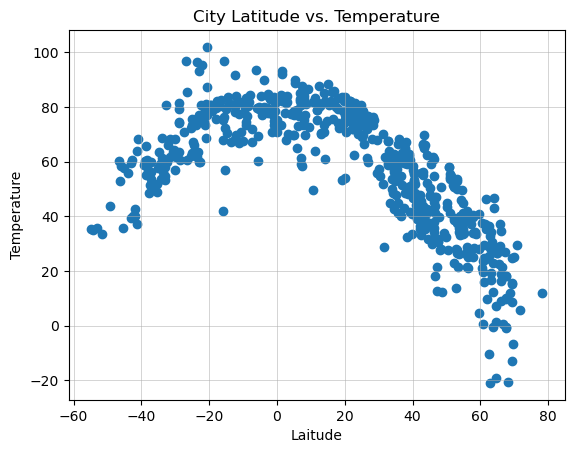

In [41]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")

plt.xlabel("Laitude")

plt.ylabel("Temperature")

plt.grid(linestyle='-', linewidth=0.5, alpha = 0.75)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

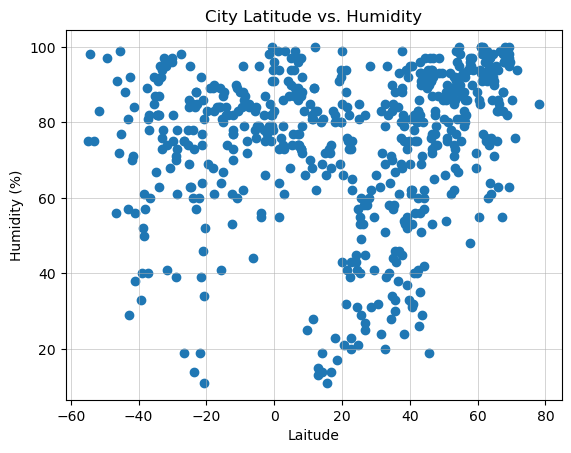

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")

plt.xlabel("Laitude")

plt.ylabel("Humidity (%)")

plt.grid(linestyle='-', linewidth=0.5, alpha = 0.75)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

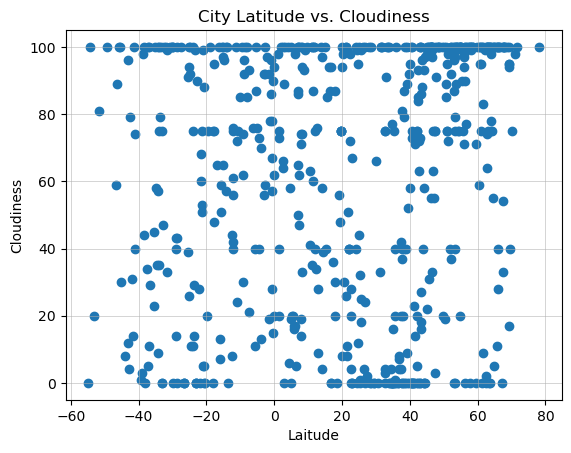

In [43]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")

plt.xlabel("Laitude")

plt.ylabel("Cloudiness")

plt.grid(linestyle='-', linewidth=0.5, alpha = 0.75)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

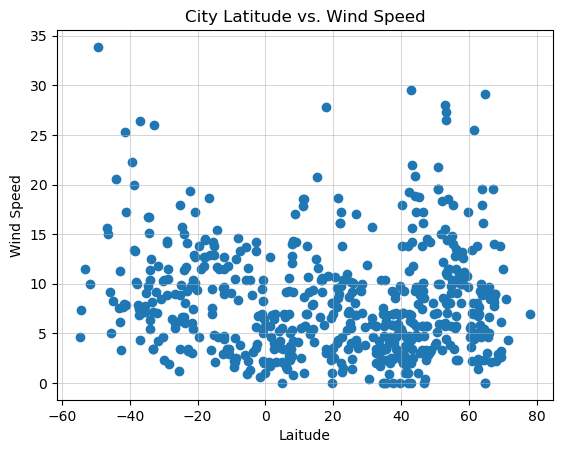

In [44]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")

plt.xlabel("Laitude")

plt.ylabel("Wind Speed")

plt.grid(linestyle='-', linewidth=0.5, alpha = 0.75)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])


# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,qaqortoq,60.7167,-46.0333,19.53,94,95,3.60,GL,1699933880
10,pizarro,4.9533,-77.3660,78.66,90,19,2.06,CO,1699933881
11,tvoroyri,61.5556,-6.8111,46.42,77,9,25.48,FO,1699933881
13,yellowknife,62.4560,-114.3525,25.32,93,100,13.80,CA,1699933528
15,fortuna,40.5982,-124.1573,55.98,95,100,1.99,US,1699933882


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,nelson bay,-32.7167,152.1500,80.65,78,47,25.99,AU,1699933879
1,adamstown,-25.0660,-130.1015,73.29,86,100,17.94,PN,1699933527
2,stawell,-37.0500,142.7667,53.62,82,100,4.32,AU,1699933880
4,edinburgh of the seven seas,-37.0676,-12.3116,56.35,78,11,26.40,SH,1699933529
5,papatowai,-46.5619,169.4708,60.24,56,59,15.57,NZ,1699933531


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8758242635999305


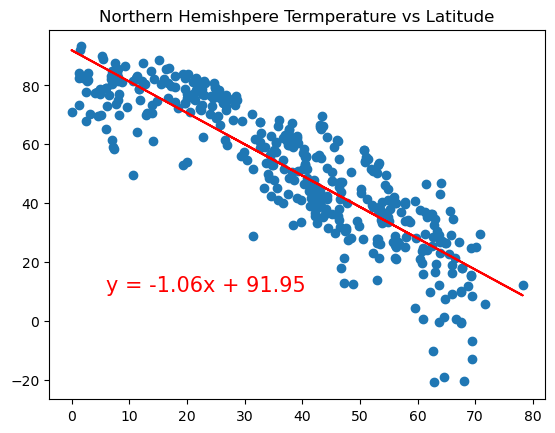

In [73]:
# Linear regression on Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regression = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemishpere Termperature vs Latitude')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], regression, color ='red')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

The r-value is 0.7163926057751505


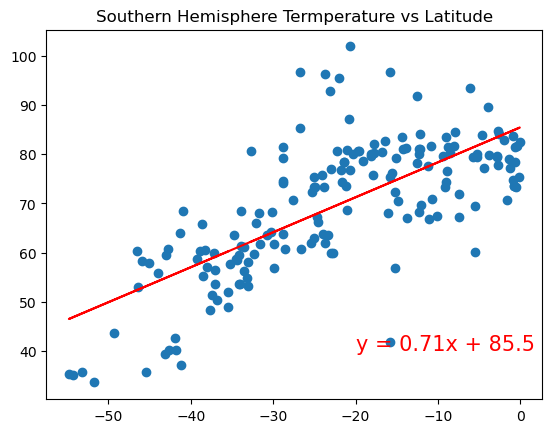

In [83]:
# Linear regression on Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regression = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere Termperature vs Latitude')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], regression, color ='red')
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2717726040193606


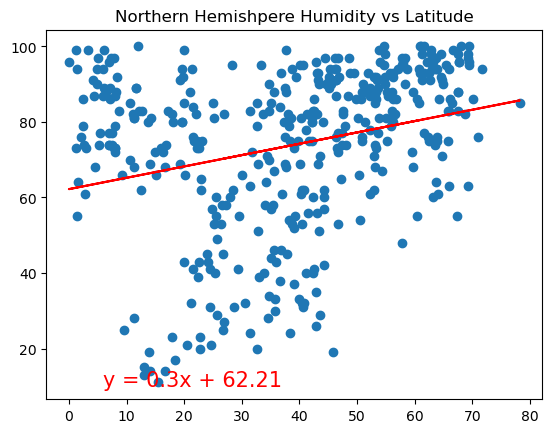

In [89]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regression = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemishpere Humidity vs Latitude')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], regression, color ='red')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

The r-value is 0.12479270999223548


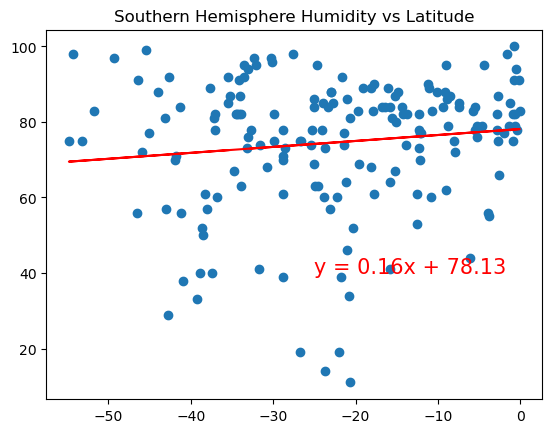

In [85]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regression = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere Humidity vs Latitude')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], regression, color ='red')
plt.annotate(line_eq,(-25, 40),fontsize=15,color="red")
print(f"The r-value is {rvalue}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.20064828862523165


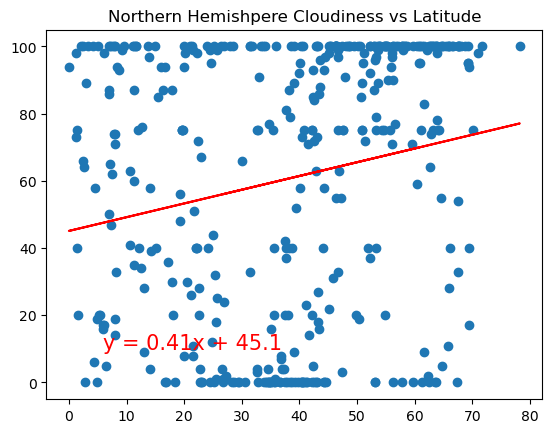

In [90]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regression = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Northern Hemishpere Cloudiness vs Latitude')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], regression, color ='red')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

The r-value is 0.11923625395307835


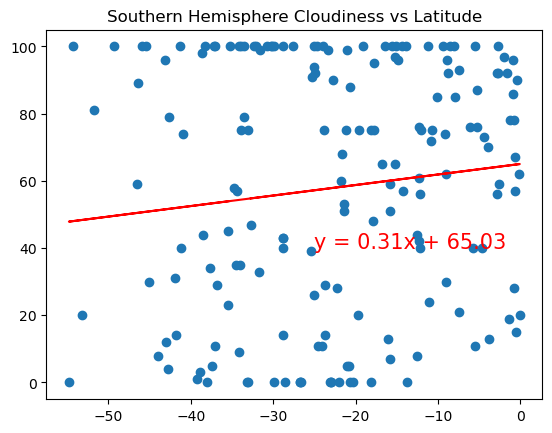

In [86]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regression = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere Cloudiness vs Latitude')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], regression, color ='red')
plt.annotate(line_eq,(-25, 40),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.13043512275188462


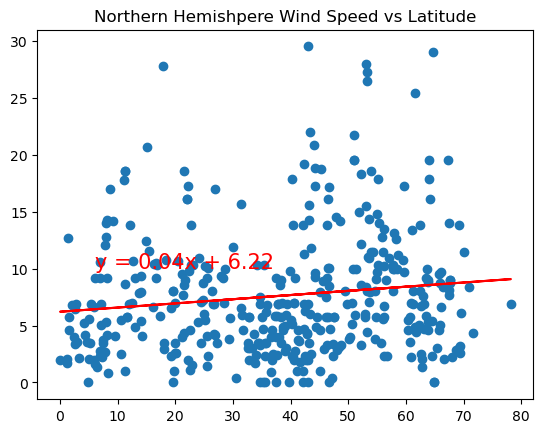

In [91]:
# Northern Hemisphere
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regression = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Northern Hemishpere Wind Speed vs Latitude')
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], regression, color ='red')
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

The r-value is -0.30486247705487224


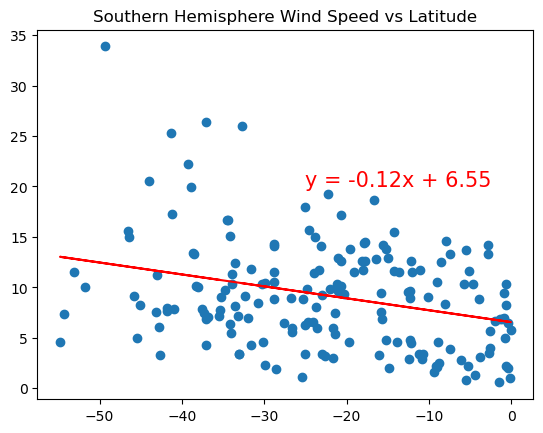

In [88]:
# Southern Hemisphere
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regression = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title('Southern Hemisphere Wind Speed vs Latitude')
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], regression, color ='red')
plt.annotate(line_eq,(-25, 20),fontsize=15,color="red")
print(f"The r-value is {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE